
#### ____

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;                        SPAM Classifier - Data Science
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Guilherme Tamer Lotaif

<br>




## Introdução

Neste projeto,será feita a implementação de um **Classificador Naive-Bayes** para filtragem de e-mails. O objetivo é criar um modelo capaz de analisar o conteúdo de uma mensagem e calcular as probabilidades condicionais de ser SPAM ou HAM. Isso permitirá a classificação automática das mensagens, contribuindo para a eficiência e organização das caixas de entrada.

O teorema de Bayes fornece a base matemática para calcular probabilidades condicionais, permitindo-nos estimar a probabilidade de um evento com base em informações prévias. Quando aplicado à classificação de texto, o Classificador Naive-Bayes assume que as palavras em uma mensagem são independentes, uma simplificação que, surpreendentemente, demonstra ser eficaz na prática.


___

### Bibliotecas:

In [1]:
#Importando as bibliotecas necessárias:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
import warnings

___
## 1. Importação e limpeza dos Arquivos

Para obter uma maior performance do algoritimo de previsão temos que: remover alguns caratcteres que não vão ajudar a fazer as previsões, pelo contrário, não remove-los só prejudica a ação do classificador, e outro método de limpeza utilizado é a transformção de todas palavras para letra minúscula, assim eliminando a existência da mesma palavra de diferentes maneiras.

In [2]:
#Abrindo o arquivo com os emails:
df = pd.read_excel('Data/spamham2019.xlsx')

In [3]:
#Dataframe do arquivo importado:
df.sample(2)

,Email,Class
100,Okay name ur price as long as its legal! Wen c...,ham
2438,Rightio. 11.48 it is then. Well arent we all u...,ham


...

#### implementação daa função destinada à limpeza: 
Com o propósito de assegurar a integridade e coerência dos dados.

In [4]:
#Criando a função para remover os caracteres que atrapalham o classificador:
def Replacer (emails):
    #vamos subtituir cada caractere indesejado por um espaço:
    emails = emails.replace("*","")
    emails = emails.replace("!","")
    emails = emails.replace("@","")
    emails = emails.replace("#","")
    emails = emails.replace("$","")
    emails = emails.replace("%","")
    emails = emails.replace("&","")
    emails = emails.replace("-","")
    emails = emails.replace("_","")
    emails = emails.replace("+","")
    emails = emails.replace("=","")
    emails = emails.replace("'","")
    emails = emails.replace("?","")
    emails = emails.replace(";","")
    emails = emails.replace(",","")
    emails = emails.replace(".","")
    emails = emails.replace(":","")
    emails = emails.replace(")","")
    emails = emails.replace("(","")
    emails = emails.replace("/","")
    emails = emails.replace('"',"")
    emails = emails.replace("[","")
    emails = emails.replace(']',"")
    emails = emails.replace("\ ","")
    
    #Vamos deixar todas as caracteres em letra minúscula:
    emails = emails.lower()
    #Vamos separar as palavras de cada email:
    emails = emails.split()

    return emails

___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
   - 75% dos dados para a parte Treinamento;
   - 25% dos dados para a parte Teste.

In [5]:
#Particionando o dataframe, com 25% do total para testes:
treinamento, teste = train_test_split(df, test_size=0.25) 

In [6]:
#Analisando quantos emails ham e spam existem no dataframe de treinamento:
ham, spam = (treinamento["Class"]).value_counts()
total_treino = treinamento["Class"].value_counts().sum()
print("O dataframe de treinamento possui:\n","HAM: {0} emails\n".format(ham)
                                            ,"SPAM: {0} emails\n".format(spam),"\nTOTAL: {0}".format(ham+spam))

O dataframe de treinamento possui:
 HAM: 3620 emails
 SPAM: 559 emails
 
TOTAL: 4179


...
#### Separando emails SPAM:

In [7]:
#Criando uma lista para as palavras dos emails SPAM:
dic_SPAM = {}
#Criando a variável contador para o total de palavras SPAM:
contador_SPAM = 0

#Criando um loop para atribuir os emails SPAM a uma variável:
for email in treinamento.Email[treinamento.Class == "spam"]:
    lista_SPAM = Replacer(email)
    #Criando um loop para alocar as palavras de SPAM no dicionário:
    for palavra in lista_SPAM:
        if palavra not in dic_SPAM:
            dic_SPAM[palavra] = 1
            contador_SPAM += 1
        else:
            dic_SPAM[palavra] += 1
            contador_SPAM += 1

In [8]:
print("Palavras sem repetição: {0}".format(len(dic_SPAM)),
      "\nTotal de palavras: {0}".format(contador_SPAM))

Palavras sem repetição: 2611 
Total de palavras: 13206


#### Separando emails HAM:

In [9]:
#Criando uma lista para as palavras dos emails HAM:
dic_HAM = {}
#Criando a variável contador para o total de palavras HAM:
contador_HAM = 0

#Criando um loop para atribuir os emails HAM a uma variável:
for email in treinamento.Email[treinamento.Class == "ham"]:
    lista_HAM = Replacer(email)
    #Criando um loop para alocar as palavras de HAM no dicionário:
    for palavra in lista_HAM:
        if palavra not in dic_HAM:
            dic_HAM[palavra] = 1
            contador_HAM += 1
        else:
            dic_HAM[palavra] += 1
            contador_HAM += 1


In [10]:
print("Palavras sem repetição: {0}".format(len(dic_HAM)),
      "\nTotal de palavras: {0}".format(contador_HAM))

Palavras sem repetição: 6494 
Total de palavras: 50507


É possivel perceber que por ter uma quantidade muito superior de emails HAM, o seu número de palavras é bem maior, e repetição também é superior do que a dos emails SPAM.

...

**Quantidade total de palavras:**

In [11]:
#Vamos contar a quantidade total de palavras:
Total_palavras = contador_SPAM + contador_HAM
print("Total: {0} Palavras".format(Total_palavras))

Total: 63713 Palavras


___
## 3. Classificador Naive-Bayes

O algoritmo Naive-Bayes é um classificador probabilístico baseado no "Teorema de Bayes". Ele usa os dados fornecidos para criar uma partição de treinamento e uma de teste, a partir da partição de treinamento o algoritmo analisa os dados , que por sua vez é feita de maneira independente, ou seja, para o algoritmo não existe uma relação de dependecia dos fatores.

...

**Antes de usar o classificador, vamos descobrir algumas probabilidades:**

- A probabilidade de uma mensagem ser SPAM, ou seja:<br>

    $P(SPAM)$

In [12]:
#Descobrindo a probabilidade a partir do total de emails SPAM, e do total geral:
Pspam = spam/len(treinamento.Email)
print("{:.2f}%".format(Pspam*100))

13.38%


- A probabilidade de uma mensagem ser HAM, ou seja:

    $P(HAM)$

In [13]:
#Descobrindo a probabilidade a partir do total de emails HAM, e do total geral:
Pham = ham/len(treinamento.Email)
print("{:.2f}%".format(Pham*100))

86.62%


- A probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM:

    $P(Palavra|SPAM)$

In [14]:
#Criando a função para descobrir a probabilidade da palavra acontecer dado que a memsagem é SPAM:
def P_palavra_spam(palavra):
    probabilidade = dic_SPAM[palavra]/contador_SPAM
    return probabilidade

- A probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada HAM:

    $P(Palavra|HAM)$

In [15]:
#Criando a função para descobrir a probabilidade da palavra acontecer dado que a memsagem é HAM:
def P_palavra_ham(palavra):
    probabilidade = dic_HAM[palavra]/contador_HAM
    return probabilidade

...

**O classificador:** 

Quando estudamos o que o modelo usa para fazer sua previsão, vemos que ele parte das informações recebidas apriori e da possibilidade, que ele descobre atraves da analise dos dados de treinamento e com isso ele faz sua previsão.<br>
Por exemplo:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Portanto, podemos dizer que:

$$P(SPAM|mensagem)=\frac{P(mensagem|SPAM)\cdot P(SPAM)}{P(mensagem)}$$
<br>

Logo, como queremos saber se o email é considerado SPAM ou HAM, podemos dividir um pelo outro.<br>
<br>

$$\frac {P(SPAM|mensagem)}{P(HAM|mensagem)}=\frac {P(mensagem|SPAM)\cdot P(SPAM)}{P(mensagem|HAM)\cdot P(SPAM)}$$

<br>

**Implementando este modelo:**<br>

**1)** Primeiro temos que criar uma função para calcular a probabilidade do email ser SPAM ou HAM, a partir dos dados obtidos da base de treinamento.

In [16]:
#Criando a função para calcular a probabilidade do email ser SPAM ou HAM:
def Calculador_de_probabilidade(Dicionario, numero_palavras, mensagem, probabilidade_priori):
    email_limpo = Replacer(mensagem)
    probabilidade = np.log(probabilidade_priori)
    #Criando um loop para analisar as palavras do email, e quantas vezes ela aparece nos dicionários:
    for palavra in email_limpo:
        Quantidade = 1 #Inicialize a quantidade com 1 para suavização de Laplace
        if palavra in Dicionario:
            Quantidade += Dicionario[palavra]
            #Atribuindo o valor da probabilidade de SPAM ou HAM, a variável "probabilidade":
        probabilidade += np.log(Quantidade/(numero_palavras + len(Dicionario)))
    return probabilidade



**2)** Uma vez que ja temos as probabilidades do email ser SPAM ou HAM, a partir da analise de suas palavras pelo algoritmo de bayes, temos que fazer uma comparação entre os dois, para isso vamos criar uma função que a partir das probabilidades calculadas pela função anterior, nos retorna a categoria mais provável do email estar.

In [17]:
#Criando a função para comparar as probabilidades do email ser SPAM ou HAM, e retornar a mais provável:
def Comparador_de_probabilidade(Probabilidade_SPAM, Probabilidade_HAM):
    if Probabilidade_SPAM > Probabilidade_HAM:
        #Quando a probabilidade de ser SPAM é superior, retorna SPAM:
        return "spam"
    elif Probabilidade_SPAM < Probabilidade_HAM:
        #Quando a probabilidade de ser HAM é superior, retorna HAM:
        return "ham"
    else:
        #Quando a probabilidade de ser SPAM é igaul a de ser HAM, retorna "igual":
        return "="


**3)** Vamos usar as funções montadas anteriormente para analisar e classificar um email:

In [18]:
#Input para o usuário declarar um email para a analise:
mensagem = input('Type an email: ')
#Utilizando a função para calcular a probablidade de ser SPAM:
Probabilidade_SPAM = Calculador_de_probabilidade(dic_SPAM, contador_SPAM, mensagem, Pspam)
#Utilizando a função para calcular a probablidade de ser HAM:
Probabilidade_HAM = Calculador_de_probabilidade(dic_HAM, contador_HAM, mensagem, Pham)
#Utilizando a função para comparar as duas probabilidades, e retornar com o resultado:
Resultado = Comparador_de_probabilidade(Probabilidade_SPAM, Probabilidade_HAM)

Type an email: hello friend


In [19]:
print(Replacer(mensagem))
print("\nEste email é: {0}".format(Resultado.upper()))

['hello', 'friend']

Este email é: HAM


...

**Vamos testar o classificador:**

Agora que ja vimos o algoritmo em funcionamento vamos testa-lo com a base de testes que separamos préviamente. Para isso vamos criar uma coluna nova no dataframe com os resultados do classificador.

In [20]:
#Suprimindo o aviso de copia de dataframe:
pd.set_option('chained_assignment',None)

In [21]:
#Criando uma lista para guardar os resultados do classificador Naive Bayes:
coluna_Resultado = []
#Criando um loop para checar o email da base de testes:
for mensagem_teste in teste["Class"]:
    #Utilizando a função para calcular a probablidade de ser SPAM:
    Probabilidade_SPAM_teste = Calculador_de_probabilidade(dic_SPAM, contador_SPAM, mensagem_teste, Pspam)
    #Utilizando a função para calcular a probablidade de ser HAM:
    Probabilidade_HAM_teste = Calculador_de_probabilidade(dic_HAM, contador_HAM, mensagem_teste, Pham)
    #Adicionando na lista os resltados do algoritmo:
    coluna_Resultado.append(Comparador_de_probabilidade(Probabilidade_SPAM_teste, Probabilidade_HAM_teste))
#Atribuindo todos os reslutados a uma coluna nova no dataframe de testes:
teste['Expected'] = coluna_Resultado

In [22]:
teste.sample(2)

,Email,Class,Expected
1068,Someone U know has asked our dating service 2 ...,spam,spam
1788,Takin a shower now but yeah I'll leave when I'...,ham,ham


In [23]:
#Analisando quantos emails ham e spam existem no dataframe de teste:
ham_teste, spam_teste = (teste["Class"]).value_counts()
total_treino = teste["Class"].value_counts().sum()

#Descobrindo os itens de teste:
expected_counts = teste["Expected"].value_counts()

#Adquirindo os value_counts:
ham_expected = expected_counts.get("ham", 0)
spam_expected = expected_counts.get("spam", 0)

print("O dataframe possui:\n","- HAM: {0} Emails\n".format(ham_teste)
     ,"- SPAM: {0} Emails\n".format(spam_teste),"\nTOTAL: {0}".format(ham_teste+spam_teste))

print("\nO algoritmo retorna:\n - HAM: {0} Emails\n".format(ham_expected)
     ,"- SPAM {0} Emails\n".format(spam_expected),"\nTOTAL: {0}".format(ham_expected+spam_expected))

O dataframe possui:
 - HAM: 1205 Emails
 - SPAM: 188 Emails
 
TOTAL: 1393

O algoritmo retorna:
 - HAM: 1205 Emails
 - SPAM 188 Emails
 
TOTAL: 1393


Com base em numerosas execuções do código, observa-se que, em casos nos quais o resultado não é correto, é devido ao código considerar todos os emails como HAM. No caso de tal ocorrência, recomenda-se reexecutar o código e comparar os resultados obtidos.

...

**Avaliação de sucessos:**

In [24]:
#Criando contadores para o classificador:
Falsos_positivos, Positivos_verdadeiros, Falsos_negativos, Negativos_verdadeiros = 0,0,0,0

#Criando um loop para comparar os resultados do classificador com a classificação pré-definida:
for Class_teste, Expected_teste in zip(teste["Class"], teste["Expected"]):
    if Class_teste == "spam" and Expected_teste == "spam":
        Positivos_verdadeiros += 1
    elif Class_teste == "ham" and Expected_teste == "spam":
        Falsos_positivos += 1
    elif Class_teste == "spam" and Expected_teste == "ham":
        Falsos_negativos += 1
    else:
        Negativos_verdadeiros += 1

<br>

- **%** de falsos positivos:

In [25]:
#Quando o classificador afirma ser SPAM mas deveria ser HAM:
print("{:.2f}%".format((Falsos_positivos/len(teste))*100))

0.00%


- **%** de positivos verdadeiros:

In [26]:
#Quando o classificador afirma ser SPAM de maneira correta:
print("{:.2f}%".format((Positivos_verdadeiros/len(teste))*100))

13.50%


- **%** de falsos negativos:

In [27]:
#Quando o classificador afirma ser HAM mas deveria ser SPAM:
print("{:.2f}%".format((Falsos_negativos/len(teste))*100))

0.00%


- **%** de negativos verdadeiros:

In [28]:
#Quando o classificador afirma ser HAM de maneira correta:
print("{:.2f}%".format(((Negativos_verdadeiros/len(teste))*100)))

86.50%


<br>

**Será que sua Acurácia esta satisfatória?**<br>
Para avaliar a acurácia do algoritmo iremos analisar a quantidade de previsões corretas que o nosso classificador fez, e dividir pela quantidade total das previsões.

In [29]:
#Criando uma variável para somar a quantidade de previsões corretas:
Corretos = 0
#Criando um loop para comparar a previsão com a classificação ja existente:
for resultado_class, resultado_expected in zip(teste["Class"],teste["Expected"]):
    if resultado_class == resultado_expected:
        Corretos += 1

In [30]:
print("Porcentagem de Acerto: {:.2f}%".format(100*Corretos/len(teste)))

Porcentagem de Acerto: 100.00%


### Aptidão do classificador:

O código montado para o algoritmo classificador Naive bayes aparenta estar funcionando com exito. Quando testamos a partir da base de teste, vemos pelo dataframe que realmente as previsões estão batendo na maioria dos casos. Porém com a mudança da base de testes a cada vez que rodamos o codigo, ele muda sua acurácia.

___
## 4. Qualidade do Classificador alterando a base de treinamento<br>
Essa fase está sendo conduzida com o propósito de investigar se uma modificação na base de treinamento influencia a qualidade do classificador. Neste contexto, estamos reproduzindo as mesmas etapas já executadas até o momento, repetindo o processo de forma iterativa por 10.000 vezes. O objetivo é obter uma quantidade substancial de informações que permita concluir se há, de fato, alguma alteração significativa decorrente dessa mudança.

In [31]:
#Criando uma lista para atribuir as taxas de acerto cada vez que a base de treinamento e teste forem trocadas:
Lista_acertos = []
#Criando um loop para rodar todas as etapas necessarias para o classificador funcionar por 10.000 vezes:
for e in range(10000):
    #Particionando o dataframe, com 25% do total para testes:
    treinamento_qualidade, teste_qualidade = train_test_split(df, test_size=0.25) 
    
    #Analisando quantos emails ham e spam existem no dataframe de treinamento:
    ham_qualidade, spam_qualidade = (treinamento_qualidade["Class"]).value_counts()
    
    #Criando uma lista para as palavras dos emails SPAM:
    dic_SPAM_2 = {}
    #Criando a variável contador para o total de palavras SPAM:
    contador_SPAM_2 = 0
    
    #Criando um loop para atribuir os emails SPAM a uma variável:
    for email_treinamento_2 in treinamento_qualidade.Email[treinamento_qualidade.Class == "spam"]:
        lista_SPAM_2 = Replacer(email_treinamento_2)
        
        #Criando um loop para alocar as palavras de SPAM no dicionário:
        for palavra in lista_SPAM_2:
            if palavra not in dic_SPAM_2:
                dic_SPAM_2[palavra] =1
                contador_SPAM_2 +=1
            else:
                dic_SPAM_2[palavra] +=1
                contador_SPAM_2 +=1
                
    #Criando uma lista para as palavras dos emails HAM:
    dic_HAM_2 = {}
    #Criando a variável contador para o total de palavras HAM:
    contador_HAM_2 = 0

    #Criando um loop para atribuir os emails HAM a uma variável:
    for email_treinamento_2 in treinamento_qualidade.Email[treinamento_qualidade.Class == "ham"]:
        lista_HAM_2 = Replacer(email_treinamento_2)
        #Criando um loop para alocar as palavras de HAM no dicionário:
        for palavra in lista_HAM_2:
            if palavra not in dic_HAM_2:
                dic_HAM_2[palavra] =1
                contador_HAM_2 +=1
            else:
                dic_HAM_2[palavra] +=1
                contador_HAM_2 +=1
    
    #Descobrindo a probabilidade a partir do total de emails SPAM, e do total geral:
    Pspam_2 = spam_qualidade/len(treinamento_qualidade.Email)
    
    #Descobrindo a probabilidade a partir do total de emails HAM, e do total geral:
    Pham_2 = ham_qualidade/len(treinamento_qualidade.Email)
    
    #Criando uma lista para guardar os resultados do classificador Naive Bayes:
    coluna_Resultado_2 = []
    #Criando um loop para checar o email da base de testes: 
    
    for mensagem_2 in teste_qualidade["Class"]:  
        #Utilizando a função para calcular a probablidade de ser SPAM:
        Probabilidade_SPAM_2 = Calculador_de_probabilidade(dic_SPAM_2, contador_SPAM_2, mensagem_2, Pspam_2)
        #Utilizando a função para calcular a probablidade de ser SPAM:
        Probabilidade_HAM_2 = Calculador_de_probabilidade(dic_HAM_2, contador_HAM_2, mensagem_2, Pham_2)
        #Adicionando na lista os resltados do algoritmo:
        coluna_Resultado_2.append(Comparador_de_probabilidade(Probabilidade_SPAM_2, Probabilidade_HAM_2))
    #Atribuindo todos os reslutados a uma coluna nova no dataframe de testes:
    teste_qualidade['Expected'] = coluna_Resultado_2
    
    #Criando contadores para as quantidades de acertos do classificador:
    Positivos_verdadeiros_2, Negativos_verdadeiros_2 = 0,0

    #Criando um loop para comparar os resultados do classificador com a classificação pré-definida:
    for Class_teste_2, Expected_teste_2 in zip(teste_qualidade["Class"], teste_qualidade["Expected"]):
        if Class_teste_2 == "spam" and Expected_teste_2 == "spam":
            Positivos_verdadeiros_2 += 1
        elif Class_teste_2 == "ham" and Expected_teste_2 == "ham":
            Negativos_verdadeiros_2 += 1
    #Alocando a taxa de acerto do classificador de cada vez que o loop rodar:
    Lista_acertos.append((100*(Positivos_verdadeiros_2+Negativos_verdadeiros_2))/len(teste))

...

### 4.1 Analise dos resultados:

Dado que o código anterior executa o classificador em 10.000 conjuntos de dados distintos, esta seção é dedicada a uma análise de sua eficácia.

In [32]:
#Crinado uma lista para os valores diferentes de 100%:
lista_1 = []

#Criando um loop para atribuir os valores diferntes de 100% a lista:
for index in range(len(Lista_acertos)):
    if Lista_acertos[index] != 100:
        lista_1.append(Lista_acertos[index])

In [33]:
#Criando contador de 100% de acertos:
lista_100 = 0
#Criando contador das demais quantidades de acertos:
lista_resto = 0
#Loop para fazer as contagens:
for n in Lista_acertos:
    if n == 100:
        lista_100 += 1
    else:
        lista_resto += 1
#Descobrindo a porcentagem de vezes que não da 100%:
lista_resto_porcentagem = (lista_resto / (lista_100 + lista_resto)) * 100
print("Porcentagem de vezes que o classificador da menos de 100%:\n- {:.2f}%".format(lista_resto_porcentagem))

Porcentagem de vezes que o classificador da menos de 100%:
- 24.93%




#### Gerando o histograma da distribuição de frequência quando não se atinge 100%:

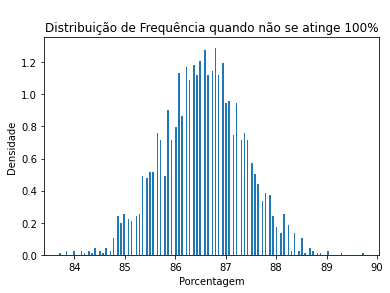

In [34]:
#Plotando o histograma da porcentagem de acerto dos classificadores:
plt.hist(lista_1, bins = 200, density = True);
plt.title("\nDistribuição de Frequência quando não se atinge 100%")
plt.xlabel("Porcentagem")
plt.ylabel("Densidade")
plt.show()

### 4.2 Conclusão:

Após a execução do classificador 10.000 vezes, destacam-se resultados que evidenciam uma notável eficácia do modelo, alcançando uma acurácia de 100% em aproximadamente 75% das instâncias. Além disso, nos casos em que a acurácia não atinge o máximo, observa-se uma consistência em torno de 86/87%.

Ao focar na variabilidade nos resultados, fica evidenciado uma influência marcante da modificação na base de treinamento sobre o desempenho do classificador. Essa observação reforça a importância da seleção e qualidade dos dados de treinamento, destacando seu papel determinante na capacidade preditiva do modelo.